# Caso 2: Creditcard Clasificación

# Paso 1: Muestra

Primero, cargue el conjunto de datos y verifique su tamaño. A continuación, realice un vistazo preliminar a los datos para entender su estructura y contenido. Si es necesario, realice un muestreo de los datos. Finalmente, divida el conjunto en conjuntos de entrenamiento y validación para facilitar el proceso de clasificación.

## 1.1 Cargar el conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Cargar el conjunto de datos
creditcard = pd.read_csv("./Data/Clasificacion-Creditcard.csv")

# Visualizar las primeras filas del conjunto de datos
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time: Tiempo transcurrido desde la primera transacción, medido en segundos.
- V1, V2, ..., V28: Variables numéricas que han sido transformadas mediante Análisis de Componentes Principales (PCA) para anonimizar datos sensibles.
- Amount: Monto de la transacción, expresado en dólares.
- Class: Etiqueta de clase que indica si la transacción es fraudulenta (0: Normal, 1: Fraude).

## 1.2 Verificar el tamaño del conjunto de datos
A continuación, verifiquemos el tamaño del conjunto de datos.

In [2]:
# Comprobar el tamaño del conjunto de datos
rows, columns = creditcard.shape
print(f"Filas: {rows}, Columnas: {columns}")

Filas: 99999, Columnas: 31


## 1.3 Partición de datos
Para garantizar que contemos con un conjunto destinado a validar nuestro modelo en etapas posteriores, es fundamental dividir los datos en un conjunto de entrenamiento y un conjunto de validación (o prueba). En este análisis, utilizaremos una división del 80% para entrenamiento y el 20% restante para validación.

In [3]:
# Dividiendo los datos en conjunto de entrenamiento (80%) y validación (20%)
train_data, validation_data = train_test_split(creditcard, test_size=0.2, random_state=42)

# Verificando el tamaño de los conjuntos de entrenamiento y validación
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]

print(f"Conjunto de entrenamiento: {train_size}")
print(f"Conjunto de validación: {validation_size}")

Conjunto de entrenamiento: 79999
Conjunto de validación: 20000


Una vez completado el paso "Muestra", pasaremos a la fase "Explorar", donde analizaremos la distribución, las estadísticas y las visualizaciones del conjunto de datos para comprender mejor su estructura y características.

# Paso 2: Exploración
Calcule estadísticas resumidas para obtener una visión general de los datos. A continuación, visualice la distribución de las características clave para identificar patrones y tendencias. Además, verifique si existen anomalías en los datos, como valores faltantes y valores atípicos, que podrían afectar el análisis posterior.

## 2.1 Estadísticas resumidas
Cálculo de estadísticas resumidas para los datos de entrenamiento

In [4]:
summary_statistics = train_data.describe()

summary_statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,...,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,42463.081101,-0.264142,-0.031702,0.674787,0.159998,-0.280068,0.091964,-0.111927,0.056655,-0.046847,...,-0.030070,-0.109119,-0.037158,0.007791,0.132035,0.027972,0.000985,0.001428,97.802880,0.002213
std,17054.974960,1.867719,1.664088,1.330321,1.348169,1.365567,1.304840,1.215889,1.223405,1.119452,...,0.724943,0.634871,0.634633,0.594714,0.441396,0.495238,0.391345,0.328227,264.162249,0.046986
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33494.500000,-1.029196,-0.600000,0.174747,-0.714938,-0.901298,-0.649981,-0.600696,-0.138032,-0.699501,...,-0.223700,-0.530643,-0.176955,-0.324751,-0.130879,-0.324645,-0.062969,-0.005367,7.580000,0.000000
50%,44347.000000,-0.259831,0.078975,0.753016,0.190633,-0.315587,-0.156946,-0.070927,0.074542,-0.118600,...,-0.057082,-0.083472,-0.049620,0.064124,0.170116,-0.069879,0.009512,0.023286,26.590000,0.000000
75%,55890.000000,1.153444,0.735556,1.374665,1.028406,0.248564,0.485180,0.411649,0.360506,0.556464,...,0.119652,0.309047,0.081673,0.405749,0.419632,0.305565,0.082644,0.076377,89.500000,0.000000
max,67374.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.348407,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


## 2.2 Visualización
A continuación, procederemos a visualizar la distribución de características clave, como el monto de la transacción, así como las variables V1, V2 y V3. Esta visualización nos ayudará a comprender mejor la variabilidad y las tendencias en los datos.

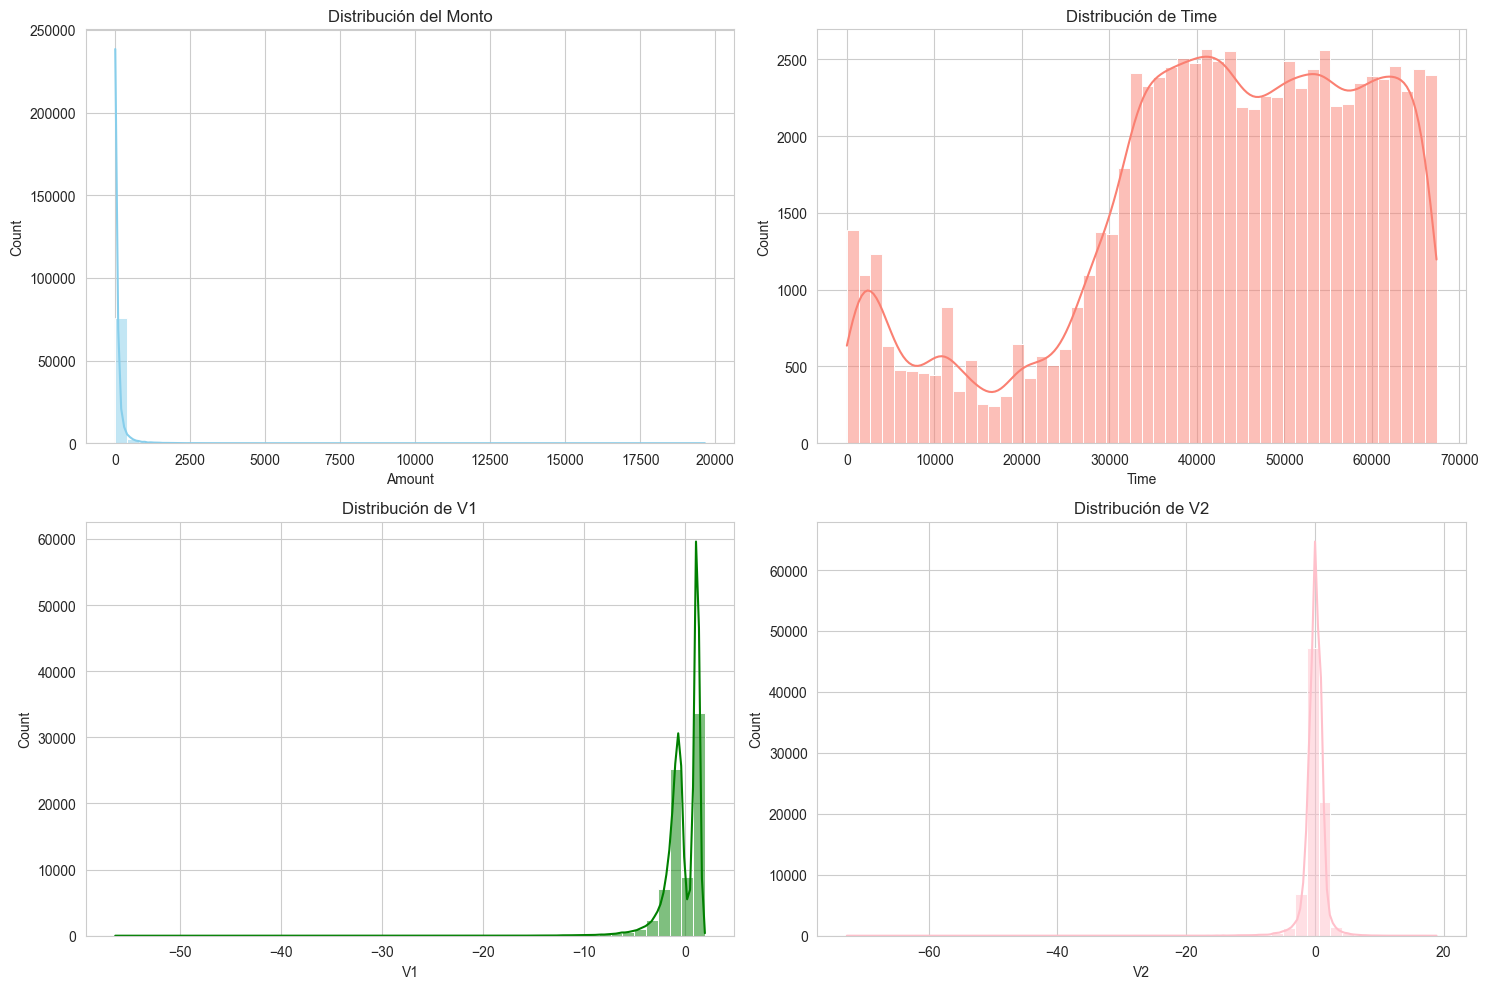

In [5]:
# Configurando el estilo para los gráficos
sns.set_style("whitegrid")

# Inicializando la figura
plt.figure(figsize=(15, 10))

# Subgráfico para 'Amount' en el conjunto de entrenamiento
plt.subplot(2, 2, 1)
sns.histplot(train_data['Amount'], bins=50, color='skyblue', kde=True)
plt.title('Distribución del Monto')

# Subgráfico para 'Time' en el conjunto de entrenamiento
plt.subplot(2, 2, 2)
sns.histplot(train_data['Time'], bins=50, color='salmon', kde=True)
plt.title('Distribución de Time')

# Subgráfico para 'V1' en el conjunto de entrenamiento
plt.subplot(2, 2, 3)
sns.histplot(train_data['V1'], bins=50, color='green', kde=True)
plt.title('Distribución de V1')

# Subgráfico para 'V2' en el conjunto de entrenamiento
plt.subplot(2, 2, 4)
sns.histplot(train_data['V2'], bins=50, color='pink', kde=True)
plt.title('Distribución de V2')

# Ajustando el diseño
plt.tight_layout()
plt.show()

A continuación, se presentan los histogramas que ilustran las distribuciones de características continuas clave:

- Monto: La mayoría de las transacciones tienen un monto entre 0 y 2,500 dólares, lo que sugiere que las transacciones menores son las más comunes en este conjunto de datos. El monto máximo registrado es de casi 20,000 dólares, lo que indica la presencia de algunas transacciones significativamente más grandes, que son poco frecuentes en comparación con la mayoría.

- Time: La distribución de esta variable muestra una tendencia mixta, con fluctuaciones a lo largo de su rango. Inicialmente, la curva tiene algunos picos irregulares que sugieren variabilidad en los primeros intervalos de tiempo. A medida que avanza, se observa un incremento gradual hasta alcanzar su punto máximo alrededor de los 40,000 segundos. Después de este pico, la distribución vuelve a mostrar irregularidades, lo que podría indicar que la actividad de las transacciones no sigue un patrón uniforme en el tiempo. Esto sugiere que ciertos momentos son más propensos a concentrar un mayor número de transacciones.

- V1: La mayoría de los valores son negativos, con un rango que varía de 0 a -10. Esto sugiere que la transformación aplicada a esta variable puede estar relacionada con algún tipo de normalización o ajuste en los datos, lo que ayuda a resaltar patrones en el comportamiento de las transacciones.

- V2: La mayoría de los valores se agrupan alrededor de 0, con algunos valores que se extienden hacia ambos lados, alcanzando aproximadamente +20 y -20. Esto sugiere que V2 puede tener una distribución simétrica en torno a cero, lo que podría indicar que la mayoría de las transacciones tienen un impacto relativamente equilibrado en esta variable.

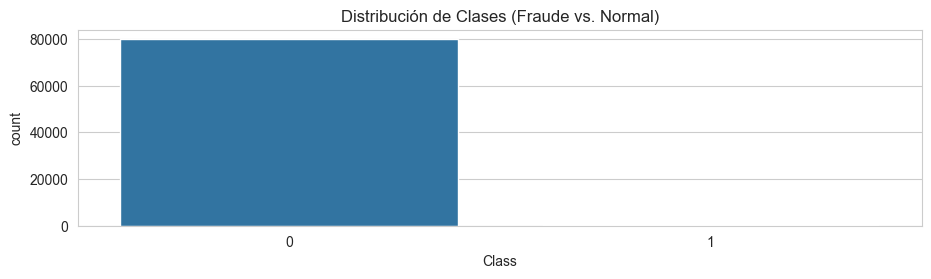

In [6]:
# Inicializando la figura
plt.figure(figsize=(18, 5))

# Subgráfico para 'Class' (variable objetivo) en el conjunto de entrenamiento
plt.subplot(2, 2, 2)
sns.countplot(x='Class', data=train_data)
plt.title('Distribución de Clases (Fraude vs. Normal)')

# Ajustando el diseño
plt.tight_layout()
plt.show()

- Clase: La mayoría de las transacciones están etiquetadas como "0", lo que indica que son transacciones legítimas (no fraudulentas). Esta distribución sugiere que el conjunto de datos está desbalanceado, con una predominancia de transacciones normales en comparación con las fraudulentas.

## 2.3 Anomalías de datos
A continuación, debemos investigar posibles anomalías, como: 
- Valores cero para V1, V2, V3, ... V28.
- Cualquier valor faltante o nulo.

In [7]:
zero_values = {
    'v1_zeros': (train_data['V1'] == 0).sum(),
    'v2_zeros': (train_data['V2'] == 0).sum(),
    'v3_zeros': (train_data['V3'] == 0).sum(),
    'v4_zeros': (train_data['V4'] == 0).sum(),
    'v5_zeros': (train_data['V5'] == 0).sum(),
    'v6_zeros': (train_data['V6'] == 0).sum(),
    'v7_zeros': (train_data['V7'] == 0).sum(),
    'v8_zeros': (train_data['V8'] == 0).sum(),
    'v9_zeros': (train_data['V9'] == 0).sum(),
    'v10_zeros': (train_data['V10'] == 0).sum(),
    'v11_zeros': (train_data['V11'] == 0).sum(),
    'v12_zeros': (train_data['V12'] == 0).sum(),
    'v13_zeros': (train_data['V13'] == 0).sum(),
    'v14_zeros': (train_data['V14'] == 0).sum(),
    'v15_zeros': (train_data['V15'] == 0).sum(),
    'v16_zeros': (train_data['V16'] == 0).sum(),
    'v17_zeros': (train_data['V17'] == 0).sum(),
    'v18_zeros': (train_data['V18'] == 0).sum(),
    'v19_zeros': (train_data['V19'] == 0).sum(),
    'v20_zeros': (train_data['V20'] == 0).sum(),
    'v21_zeros': (train_data['V21'] == 0).sum(),
    'v22_zeros': (train_data['V22'] == 0).sum(),
    'v23_zeros': (train_data['V23'] == 0).sum(),
    'v24_zeros': (train_data['V24'] == 0).sum(),
    'v25_zeros': (train_data['V25'] == 0).sum(),
    'v26_zeros': (train_data['V26'] == 0).sum(),
    'v27_zeros': (train_data['V27'] == 0).sum(),
    'v28_zeros': (train_data['V28'] == 0).sum()
}

zero_values

{'v1_zeros': np.int64(0),
 'v2_zeros': np.int64(0),
 'v3_zeros': np.int64(0),
 'v4_zeros': np.int64(0),
 'v5_zeros': np.int64(0),
 'v6_zeros': np.int64(0),
 'v7_zeros': np.int64(0),
 'v8_zeros': np.int64(0),
 'v9_zeros': np.int64(0),
 'v10_zeros': np.int64(0),
 'v11_zeros': np.int64(0),
 'v12_zeros': np.int64(0),
 'v13_zeros': np.int64(0),
 'v14_zeros': np.int64(0),
 'v15_zeros': np.int64(0),
 'v16_zeros': np.int64(0),
 'v17_zeros': np.int64(0),
 'v18_zeros': np.int64(0),
 'v19_zeros': np.int64(0),
 'v20_zeros': np.int64(0),
 'v21_zeros': np.int64(0),
 'v22_zeros': np.int64(0),
 'v23_zeros': np.int64(0),
 'v24_zeros': np.int64(0),
 'v25_zeros': np.int64(0),
 'v26_zeros': np.int64(0),
 'v27_zeros': np.int64(0),
 'v28_zeros': np.int64(0)}

Al parecer no existen anomalías en las variables anonimizadas.

In [8]:
# Comprobando valores faltantes en el conjunto de datos de entrenamiento 
valores_faltantes = train_data.isnull().sum() 

valores_faltantes

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como resultado vemos que no se encontraron valores faltantes en el conjunto de datos de entrenamiento.

### Resumiendo el paso de exploración:
- Hemos analizado las distribuciones de las características clave y los patrones observados.
- No identificamos anomalías en las variables anonimizadas.

Esto sugiere que nuestros datos están en buen estado para proceder con el análisis.

# Paso 3: Modificar
En esta fase, abordaremos las anomalías de los datos y los prepararemos para el modelado.

## 3.1 Manejo de valores cero en dimensiones V1 a V28
Dado que no hay valores nulos ni anomalías en el conjunto de datos, no es necesario realizar reemplazos. Los valores cero se mantendrán tal como están, ya que forman parte de las observaciones válidas.

## 3.2 Ingeniería de características
Considerando el conjunto de datos, una característica potencial que podemos diseñar es la suma total de las variables V1 a V28, calculada mediante la fórmula: suma_V=V1+V2+V3+…+V28

Esta nueva característica podría ayudar a capturar la magnitud acumulada de las señales proporcionadas por las variables anonimizadas, lo que podría estar relacionado con patrones inusuales en las transacciones e indicar un posible fraude. Procedamos a crear esta nueva característica.

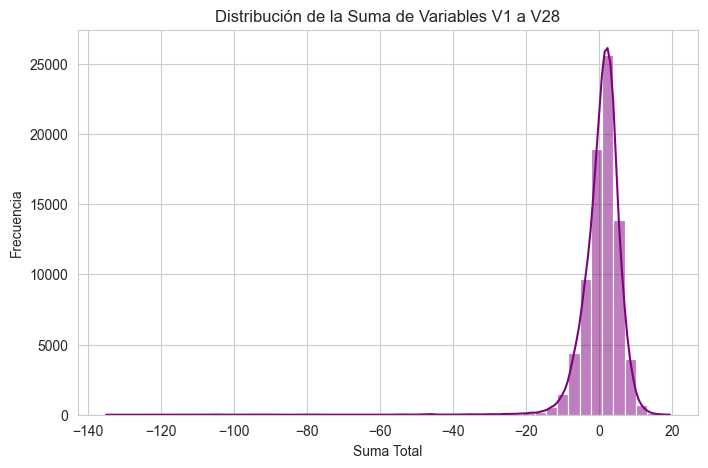

In [9]:
# Crear la característica 'suma_V' como la suma de todas las variables V1 a V28
train_data['suma_V'] = train_data[[f'V{i}' for i in range(1, 29)]].sum(axis=1)

# Visualizar la distribución de la nueva característica 'suma_V'
plt.figure(figsize=(8, 5))
sns.histplot(train_data['suma_V'], bins=50, color='purple', kde=True)
plt.title('Distribución de la Suma de Variables V1 a V28')
plt.xlabel('Suma Total')
plt.ylabel('Frecuencia')
plt.show()

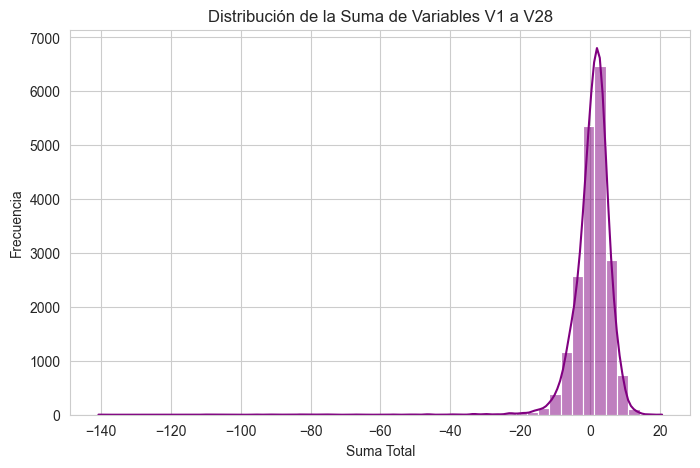

In [10]:
# Crear la característica 'suma_V' como la suma de todas las variables V1 a V28
validation_data['suma_V'] = validation_data[[f'V{i}' for i in range(1, 29)]].sum(axis=1)

# Visualizar la distribución de la nueva característica 'suma_V'
plt.figure(figsize=(8, 5))
sns.histplot(validation_data['suma_V'], bins=50, color='purple', kde=True)
plt.title('Distribución de la Suma de Variables V1 a V28')
plt.xlabel('Suma Total')
plt.ylabel('Frecuencia')
plt.show()

Aquí se presenta la distribución de la característica recientemente diseñada, que representa la suma acumulada de las variables V1 a V28. La mayoría de las transacciones tienen una suma total concentrada en valores cercanos a cero, mientras que algunas presentan valores más altos o más bajos, lo que podría indicar un comportamiento inusual o potencialmente fraudulento.

## 3.3 Preparación de los Datos para el Modelo

Para mejorar la precisión y generalización del modelo, es necesario realizar una serie de pasos de preprocesamiento en el conjunto de datos antes de entrenar. En esta sección, separamos los predictores y la variable objetivo para los conjuntos de entrenamiento y validación, y aplicamos técnicas de muestreo y escalado para optimizar la calidad del conjunto de datos de entrenamiento:

- Separación de Predictores y Variable Objetivo: Los datos se dividen en características predictivas (X) y la variable objetivo (y), tanto para el conjunto de entrenamiento como para el de validación.
- Muestreo: Se extrae una muestra del 10% del conjunto de datos de entrenamiento para reducir el tamaño de los datos y optimizar el proceso.
- Balanceo de Clases con SMOTE: Aplicamos la técnica SMOTE para equilibrar la distribución de clases en el conjunto de datos de entrenamiento, abordando el problema de clases desbalanceadas.
- Escalado de Características: Las características se estandarizan utilizando StandardScaler, lo que ayuda a mejorar la convergencia y el rendimiento del modelo durante el entrenamiento.

In [11]:
# Separando predictores y variable objetivo para el conjunto de entrenamiento
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']

# Antes de cualquier procesamiento
print("Conjunto de entrenamiento original:")
print(f"Dimensiones: {X_train.shape}")
print("Distribución de clases:", y_train.value_counts(), "\n")

# Separando predictores y variable objetivo para el conjunto de validación
X_validation = validation_data.drop(columns=['Class'])
y_validation = validation_data['Class']

# Aplicar muestreo
train_data_sampled = train_data.sample(frac=0.1, random_state=42)
X_train_sampled = train_data_sampled.drop(columns=['Class'])
y_train_sampled = train_data_sampled['Class']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sampled, y_train_sampled)

# Aplicar standarScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_validation_scaled = scaler.transform(X_validation)

print("Después de aplicar SMOTE para balanceo de clases:")
print(f"Dimensiones: {X_train_smote.shape}")
print("Distribución de clases:", y_train_smote.value_counts(), "\n")

Conjunto de entrenamiento original:
Dimensiones: (79999, 31)
Distribución de clases: Class
0    79822
1      177
Name: count, dtype: int64 

Después de aplicar SMOTE para balanceo de clases:
Dimensiones: (15958, 31)
Distribución de clases: Class
0    7979
1    7979
Name: count, dtype: int64 



# Paso 4: Modelo
En esta fase, elegiremos un modelo apropiado y lo entrenaremos utilizando los datos de entrenamiento. Posteriormente, validaremos su desempeño en el conjunto de validación. Dada la naturaleza del conjunto de datos y nuestra variable objetivo (Class), este se clasifica como un problema de clasificación.

Nuestro objetivo es predecir el fraude en función de las otras variables disponibles. Los modelos que utilizaremos son:

- Regresión Logística
- K-Nearest Neighbors (KNN)
- Random Forest Classifier
- Support Vector Machine (SVM)
- Árbol de Decisión

# 4.1 Selección y capacitación del modelo

## Modelo 1: Regresión Logística
Comencemos seleccionando el modelo de Regresión Logística. Primero, lo entrenaremos utilizando nuestros datos de entrenamiento y luego validaremos su desempeño en el conjunto de validación.

Para ello, prepararemos nuestros datos separando los predictores de la variable objetivo (Class). Una vez que los datos estén listos, procederemos a entrenar el modelo.

In [12]:
# Entrenando el modelo de regresión logística
log_model = LogisticRegression(solver='liblinear', max_iter=2000)
log_model.fit(X_train_scaled, y_train_smote)

# Haciendo predicciones en el conjunto de validación
y_pred = log_model.predict(X_validation_scaled)

# Reporte de Clasificación
clp = classification_report(y_validation, y_pred)
print("\nReporte de clasificación:")
print(clp)

# Cálculo del AUC-ROC
roc_auc = roc_auc_score(y_validation, log_model.predict_proba(X_validation_scaled)[:, 1])
print(f'\nAUC-ROC: {roc_auc:.4f}')


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19954
           1       0.46      0.85      0.60        46

    accuracy                           1.00     20000
   macro avg       0.73      0.92      0.80     20000
weighted avg       1.00      1.00      1.00     20000


AUC-ROC: 0.9813


Rendimiento del modelo de Regresión Logística en el conjunto de validación:

Métricas principales:
- Precisión (Precision): Mide cuántas de las predicciones positivas fueron correctas.
- Recall (Sensibilidad): Mide cuántos casos positivos fueron identificados correctamente.
- AUC-ROC: 0.9813

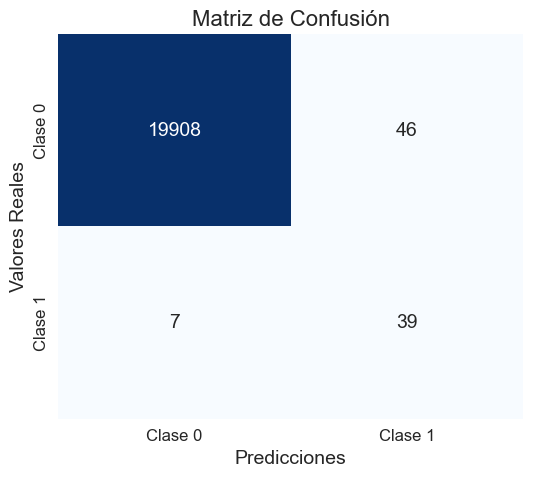

In [13]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Valores Reales', fontsize=14)
plt.xticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.yticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.show()

Matriz de Confusión:
- Clase 0 (Negativa): 19,908 predicciones correctas, 46 incorrectas.
- Clase 1 (Positiva): 39 predicciones correctas, 7 incorrectas.

Según la matriz de confusión, el modelo predijo correctamente 19,908 transacciones legítimas (Clase 0) y cometió 46 errores al clasificar transacciones legítimas como fraudulentas. En cuanto a las transacciones fraudulentas (Clase 1), identificó correctamente 39 casos, pero erróneamente clasificó 7 transacciones fraudulentas como legítimas. Esto resalta un problema de desbalance en los datos, indicando que el modelo podría estar subestimando los fraudes y sugiriendo la necesidad de técnicas adicionales para mejorar la detección.

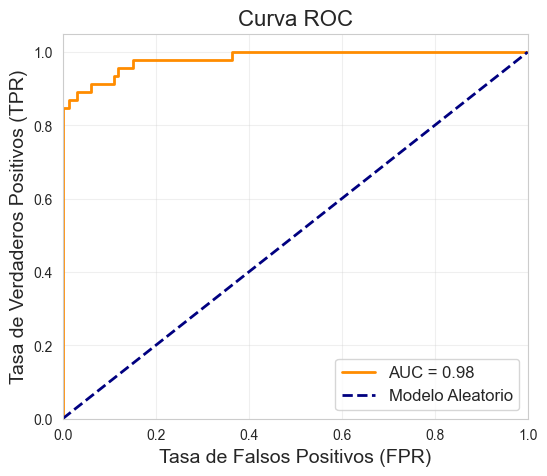

In [14]:
y_prob = log_model.predict_proba(X_validation_scaled)[:, 1] 
fpr, tpr, _ = roc_curve(y_validation, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14)
plt.title('Curva ROC', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

La curva ROC muestra un AUC de 0.9813, lo que indica un excelente rendimiento en la discriminación entre clases. Sin embargo, la matriz de confusión revela que el modelo tiene un número considerable de falsos negativos, lo que sugiere que ajustar los umbrales podría mejorar la identificación de fraudes.

## Modelo 2: K-Nearest Neighbors (KNN)

Procedamos a entrenar un modelo de K-Nearest Neighbors (KNN) utilizando nuestro conjunto de datos. Mantendremos los mismos predictores y la variable objetivo que utilizamos previamente. Una vez que hayamos entrenado el modelo KNN, evaluaremos su rendimiento en el conjunto de validación y lo compararemos con el modelo de Regresión Logística entrenado anteriormente.

KNN es un algoritmo basado en instancias que clasifica nuevos datos al compararlos con sus K vecinos más cercanos. El rendimiento del modelo está altamente influenciado por el valor de K, el cual debe seleccionarse cuidadosamente para encontrar un equilibrio óptimo entre sesgo y varianza.

In [15]:
# Entrenando KNN con K=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train_smote)

# Predicciones sobre el conjunto de validación
y_pred = knn_model.predict(X_validation_scaled)
y_prob = knn_model.predict_proba(X_validation_scaled)[:, 1]

# Reporte de Clasificación
clp = classification_report(y_validation, y_pred)
print("\nReporte de Clasificación:")
print(clp)

# Cálculo del AUC-ROC
roc_auc = roc_auc_score(y_validation, y_prob)
print(f'\nAUC-ROC: {roc_auc:.4f}')


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19954
           1       0.75      0.72      0.73        46

    accuracy                           1.00     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       1.00      1.00      1.00     20000


AUC-ROC: 0.8801


Rendimiento del modelo K-Nearest Neighbors (KNN) en el conjunto de validación:

Métricas principales:
- Precisión (Precision): Mide cuántas de las predicciones positivas fueron correctas.
- Recall (Sensibilidad): Mide cuántos casos positivos fueron identificados correctamente.
- AUC-ROC: 0.8801

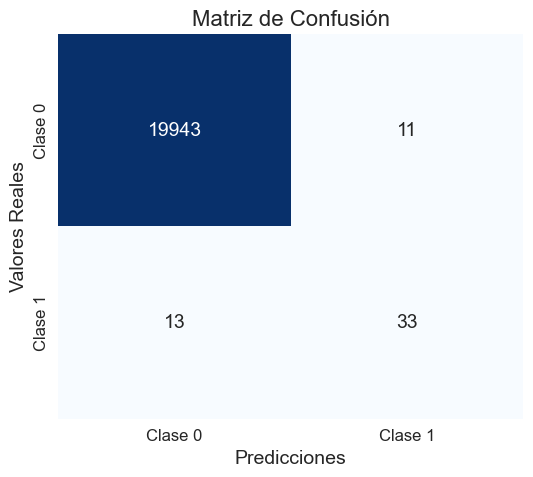

In [16]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Valores Reales', fontsize=14)
plt.xticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.yticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.show()

Matriz de Confusión:
- Clase 0 (Negativa): 19,943 predicciones correctas, 11 incorrectas.
- Clase 1 (Positiva): 33 predicciones correctas, 13 incorrectas.

Según la matriz de confusión, el modelo predijo correctamente 19,943 transacciones legítimas (Clase 0) y cometió 11 errores al clasificar transacciones legítimas como fraudulentas. En cuanto a las transacciones fraudulentas (Clase 1), identificó correctamente 33 casos, pero erróneamente clasificó 13 transacciones fraudulentas como legítimas. Esto resalta un problema de desbalance en los datos, indicando que el modelo podría estar subestimando los fraudes y sugiriendo la necesidad de técnicas adicionales para mejorar la detección.

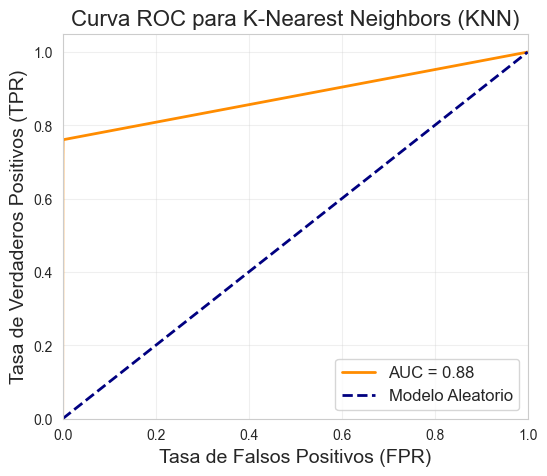

In [17]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_validation, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}') 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14)
plt.title('Curva ROC para K-Nearest Neighbors (KNN)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

La curva ROC muestra un AUC de 0.8801, lo que indica un buen desempeño en la discriminación entre las clases. Sin embargo, el AUC es inferior al del modelo de Regresión Logística, lo que sugiere que KNN puede no ser tan efectivo como se esperaba en este caso específico.

## Modelo 3: Random Forest Classifier

Entrenaremos un modelo de Random Forest Classifier con nuestro conjunto de datos de entrenamiento, utilizando los mismos predictores y la variable objetivo (class). Tras el entrenamiento, evaluaremos su rendimiento en el conjunto de validación y lo compararemos con los modelos anteriores.

El Random Forest es un algoritmo que combina varios árboles de decisión para mejorar la precisión y evitar el sobreajuste. Cada árbol se entrena con una muestra aleatoria de los datos, y su predicción se promedia con las de los demás, lo que proporciona una clasificación más robusta.

In [18]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)

# Realizar predicciones
y_pred = rf_model.predict(X_validation_scaled)
y_prob = rf_model.predict_proba(X_validation_scaled)[:, 1]

# Reporte de Clasificación
clp = classification_report(y_validation, y_pred, zero_division=1)
print("\nReporte de Clasificación:")
print(clp)

# Calcular AUC-ROC
roc_auc = roc_auc_score(y_validation, y_prob)
print(f'\nAUC-ROC: {roc_auc:.4f}')


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19954
           1       0.85      0.74      0.79        46

    accuracy                           1.00     20000
   macro avg       0.92      0.87      0.90     20000
weighted avg       1.00      1.00      1.00     20000


AUC-ROC: 0.9533


Rendimiento del modelo de Random Forest Classifier en el conjunto de validación:

Métricas principales:
- Precisión (Precision): Mide cuántas de las predicciones positivas fueron correctas.
- Recall (Sensibilidad): Mide cuántos casos positivos fueron identificados correctamente.
- AUC-ROC: 0.9533

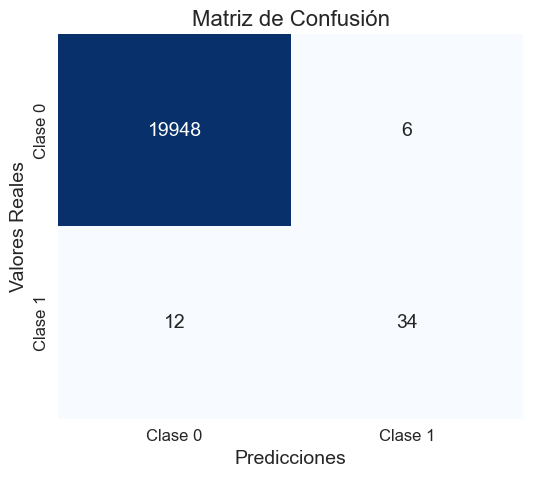

In [19]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Valores Reales', fontsize=14)
plt.xticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.yticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.show()

Matriz de Confusión:
- Clase 0 (Negativa): 19,948 predicciones correctas, 6 incorrectas.
- Clase 1 (Positiva): 34 predicciones correctas, 12 incorrectas.

En la matriz de confusión, el modelo identifica correctamente 19,948 instancias de la clase 0 (negativa) y 34 de la clase 1 (positiva). Sin embargo, hay 6 predicciones incorrectas para la clase 0 y 12 para la clase 1. Esto refleja un buen desempeño general, aunque sugiere que el modelo tiene más dificultades para identificar correctamente las transacciones positivas, lo que podría deberse al desbalance en los datos.

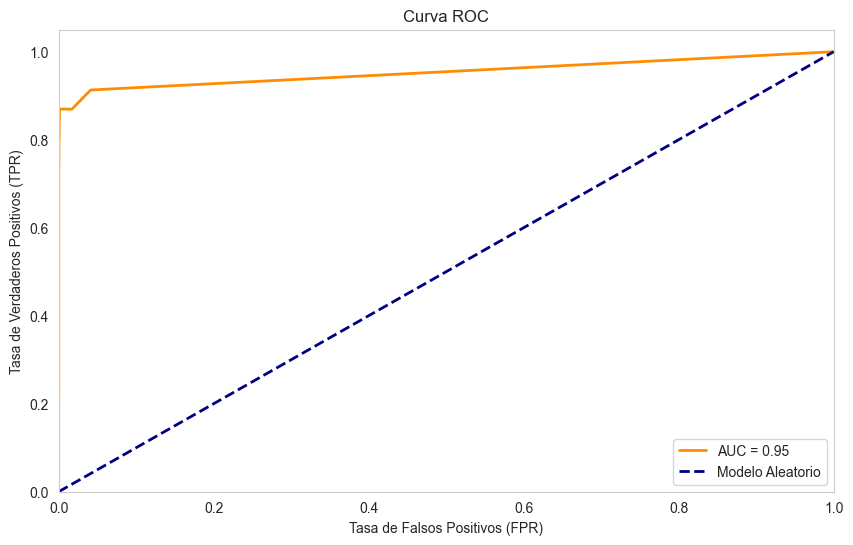

In [20]:
# Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_validation, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}') 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

El AUC-ROC de 0.9533 indica un excelente rendimiento del modelo en la discriminación entre clases. Esto significa que el modelo tiene una alta capacidad para distinguir entre transacciones legítimas y fraudulentas, acercándose a un desempeño casi perfecto.

## Modelo 4: Support Vector Machine (SVM)
En este caso, entrenaremos un modelo de Support Vector Machine (SVM) utilizando nuestro conjunto de datos de entrenamiento, con los mismos predictores y la variable objetivo (class). Luego, evaluaremos su rendimiento en el conjunto de validación y lo compararemos con los modelos anteriores.

SVM es un algoritmo de aprendizaje supervisado que busca encontrar un hiperplano óptimo para separar las diferentes clases. Este enfoque permite mejorar la precisión del modelo y manejar datos no lineales mediante el uso de diferentes núcleos (kernels).

In [21]:
# Convertir X_train_scaled y X_validation_scaled a DataFrames para mantener los nombres de columna
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_sampled.columns)
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns=X_validation.columns)

# Entrenando el modelo SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, max_iter=5000)
svm_model.fit(X_train_scaled, y_train_smote)

# Haciendo predicciones en el conjunto de validación
y_pred = svm_model.predict(X_validation_scaled)

# Reporte de Clasificación
clp = classification_report(y_validation, y_pred, zero_division=1)
print("\nReporte de clasificación:")
print(clp)

# Cálculo del AUC-ROC
y_prob = svm_model.predict_proba(X_validation_scaled)[:, 1]
roc_auc = roc_auc_score(y_validation, y_prob)
print(f'\nAUC-ROC: {roc_auc:.4f}')


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19954
           1       0.66      0.50      0.57        46

    accuracy                           1.00     20000
   macro avg       0.83      0.75      0.78     20000
weighted avg       1.00      1.00      1.00     20000


AUC-ROC: 0.9914


Rendimiento del modelo de Support Vector Machine en el conjunto de validación:

Métricas principales:
- Precisión (Precision): Mide cuántas de las predicciones positivas fueron correctas.
- Recall (Sensibilidad): Mide cuántos casos positivos fueron identificados correctamente.
- AUC-ROC: 0.9914

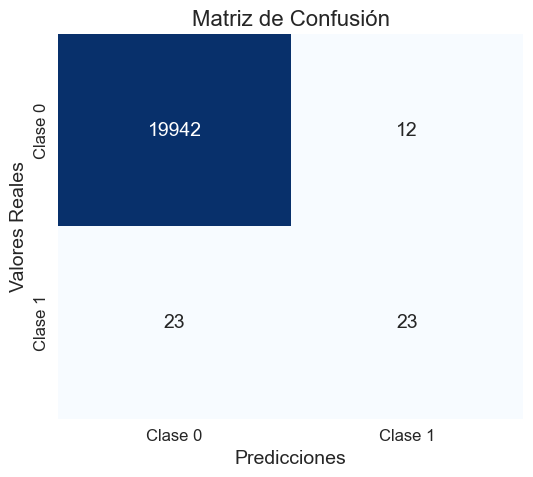

In [22]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Valores Reales', fontsize=14)
plt.xticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.yticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.show()

Matriz de Confusión:
- Clase 0 (Negativa): 19,912 predicciones correctas y 42 incorrectas. 
- Clase 1 (Positiva): 15 predicciones correctas y 31 incorrectas. 
  
En la matriz de confusión, el modelo identifica correctamente 19,912 instancias de la clase 0 (negativa) y 15 de la clase 1 (positiva). Sin embargo, hay 42 predicciones incorrectas para la clase 0 y 31 para la clase 1. Esto refleja un buen desempeño general al identificar la clase negativa, pero sugiere que el modelo tiene dificultades significativas para identificar correctamente las transacciones positivas. La baja precisión y recall para la clase 1 indican que el modelo puede estar sesgado hacia la clase negativa, lo que podría deberse a un desbalance en los datos.

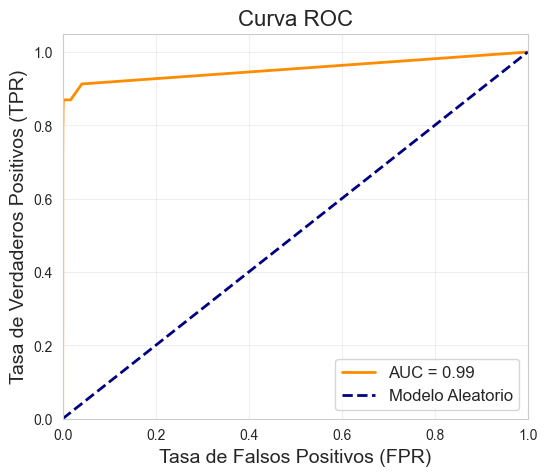

In [23]:
# Calcular los puntos de la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14)
plt.title('Curva ROC', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El AUC-ROC de 0.9845 refleja el modelo tiene un rendimiento excelente en la discriminación entre las clases positiva y negativa. Sin embargo, la baja precisión (26%) y el bajo recall (33%) de la clase positiva sugiere que, a pesar de su capacidad general para distinguir entre las clases, el modelo tiene dificultades para identificar correctamente las instancias de la clase positiva, lo que podría requerir ajustes adicionales en el proceso de entrenamiento o el uso de técnicas de balanceo de clases.

## Modelo 5: Árbol de Decisión

Por último, entrenaremos un modelo de Árbol de Decisión utilizando nuestro conjunto de datos de entrenamiento, con los mismos predictores y la variable objetivo (class). Evaluaremos su rendimiento en el conjunto de validación y lo compararemos con los modelos anteriores.

El Árbol de Decisión es un algoritmo de aprendizaje supervisado que utiliza una estructura en forma de árbol para tomar decisiones basadas en las características de los datos. Este enfoque permite visualizar fácilmente el proceso de toma de decisiones, lo que facilita la interpretación de los resultados. Además, el modelo puede manejar tanto variables categóricas como continuas, lo que lo convierte en una opción versátil para problemas de clasificación.

In [24]:
# Entrenar el modelo de Árbol de Decisión con balanceo de clases
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)
dt_model.fit(X_train_scaled, y_train_smote)

# Hacer predicciones en el conjunto de validación
y_pred = dt_model.predict(X_validation_scaled)

# Reporte de clasificación
clp = classification_report(y_validation, y_pred)
print("\nReporte de clasificación:")
print(clp)

# Cálculo del AUC-ROC
y_prob = dt_model.predict_proba(X_validation_scaled)[:, 1]
roc_auc = roc_auc_score(y_validation, y_prob)
print(f'\nAUC-ROC: {roc_auc:.4f}')


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19954
           1       0.72      0.78      0.75        46

    accuracy                           1.00     20000
   macro avg       0.86      0.89      0.87     20000
weighted avg       1.00      1.00      1.00     20000


AUC-ROC: 0.8910


Rendimiento del modelo de Árbol de Decisión en el conjunto de validación:

Métricas Principales:
- Precisión (Precision): Mide cuántas de las predicciones positivas fueron correctas.
- Recall (Sensibilidad): Mide cuántos casos positivos fueron identificados correctamente.
- AUC-ROC: 0.8910

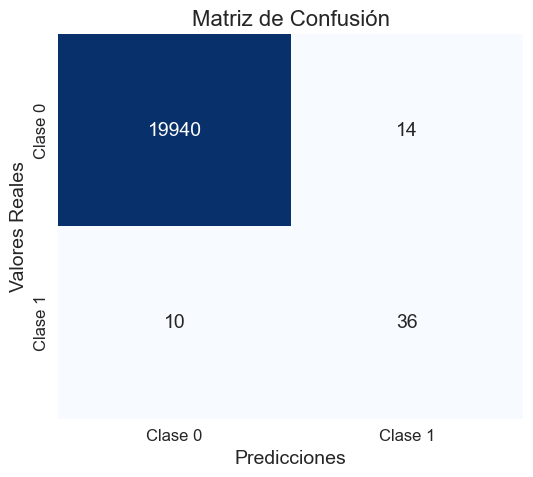

In [25]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Valores Reales', fontsize=14)
plt.xticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.yticks([0.5, 1.5], labels=['Clase 0', 'Clase 1'], fontsize=12)
plt.show()

Matriz de Confusión:
- Clase 0 (Negativa): El modelo hizo 19,948 predicciones correctas y 6 incorrectas. 
- Clase 1 (Positiva): El modelo identificó correctamente 34 instancias y cometió 12 errores.
  
En la matriz de confusión, el modelo identifica correctamente 19,948 instancias de la clase 0 (negativa) y 34 de la clase 1 (positiva), con 6 y 12 predicciones incorrectas, respectivamente. Aunque la precisión del 72% y el recall del 78% para la clase 1 indican que el modelo puede detectar algunas transacciones fraudulentas, todavía hay margen de mejora, posiblemente debido al desbalance en los datos, a pesar de aplicar SMOTE.

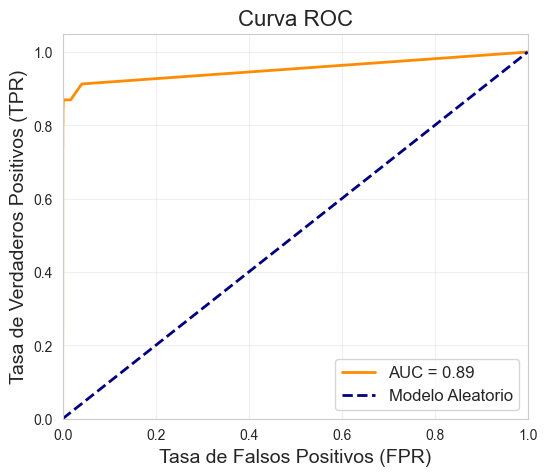

In [26]:
# Calcular los puntos de la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14)
plt.title('Curva ROC', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El AUC-ROC de 0.8910 indica que el modelo muestra un buen rendimiento en la discriminación entre las clases positiva y negativa. Sin embargo, las métricas de precisión y recall para la clase positiva sugieren que, a pesar de su habilidad general para diferenciar entre las clases, el modelo enfrenta dificultades para identificar correctamente las instancias positivas. Esto podría requerir ajustes en el proceso de entrenamiento o la exploración de otras técnicas para mejorar el equilibrio de clases.

# 4.2 De la comparación visual:
Caso 1: Regresión Logística
- La regresión logística presenta un rendimiento sobresaliente con un AUC-ROC de 0.9813, reflejando su alta capacidad de discriminación. La precisión del 100% en la clase negativa (0) y un recall del 85% en la clase positiva (1) indican que, aunque el modelo es efectivo en la identificación de instancias positivas, la sensibilidad puede mejorarse. Sin embargo, el bajo número de instancias positivas (solo 46) limita la generalización de estos resultados. La matriz de confusión muestra 19,908 predicciones correctas y 46 errores en total.

Caso 2: K-Nearest Neighbors (KNN)
- El modelo KNN ofrece un AUC-ROC de 0.8801, lo que indica una capacidad de discriminación más limitada en comparación con la regresión logística. Aunque mantiene una precisión del 100% en la clase negativa y un recall del 72% en la clase positiva, muestra debilidades en la identificación de instancias positivas, con un total de 13 errores en esta clase. La matriz de confusión indica 19,943 predicciones correctas para la clase negativa y 33 para la positiva.

Caso 3: Random Forest Classifier
- El modelo Random Forest se destaca con un AUC-ROC de 0.9533 y una precisión del 100% en la clase negativa, así como un recall del 74% en la clase positiva. Su capacidad para manejar datos complejos es una ventaja. Sin embargo, la disminución en el recall sugiere que puede estar perdiendo algunas instancias positivas, reflejado en la matriz de confusión con 34 aciertos y 12 errores en la clase positiva, lo que indica que aún hay margen de mejora en la identificación de esta clase.

Caso 4: Support Vector Machine (SVM)
- El modelo SVM muestra un AUC-ROC alto de 0.9914, lo que indica su potencial para discriminar entre clases. Sin embargo, presenta una baja precisión (66%) y un recall del 50% para la clase positiva, lo que sugiere que tiene dificultades significativas para identificar instancias positivas. La matriz de confusión revela solo 15 aciertos y 31 errores en esta clase, lo que limita su utilidad en escenarios donde la identificación de la clase positiva es crítica.

Caso 5: Árbol de Decisión
- El modelo árbol de decisión tiene un AUC-ROC de 0.8910, indicando una capacidad aceptable para discriminar clases. Con una precisión del 100% en la clase negativa y un recall del 78% en la clase positiva, su rendimiento es razonable. Sin embargo, los 12 errores en la identificación de instancias positivas sugieren que el modelo podría estar sobreajustado o no capturando completamente la complejidad del problema. La matriz de confusión muestra 34 aciertos y 12 errores en la clase positiva.

En resumen, la regresión logística y el Random Forest son los modelos más destacados en términos de rendimiento, aunque ambos tienen oportunidades de mejora en la identificación de instancias positivas. KNN ofrece un rendimiento aceptable, pero su capacidad de detección es inferior. El SVM, a pesar de su alto AUC-ROC, enfrenta desafíos significativos en la identificación de instancias positivas, mientras que el árbol de decisión presenta un desempeño razonable pero con un riesgo de sobreajuste. Esto resalta la importancia de considerar no solo la precisión general, sino también el equilibrio entre precisión y recall al evaluar la efectividad de los modelos.

# Paso 5: Evaluar
# 5.1 Evaluación más amplia
Al revisar las métricas de rendimiento, como precisión, recall y AUC-ROC, es fundamental considerar el contexto de cada modelo. Por ejemplo, el modelo Random Forest, con un AUC-ROC de 0.9533, demuestra una excelente capacidad de discriminación, lo que es valioso en aplicaciones críticas como la detección de fraudes. Sin embargo, el Support Vector Machine, aunque muestra un AUC-ROC alto de 0.9914, presenta baja precisión (66%) y recall (50%) para la clase positiva, lo que indica que podría no ser suficiente en situaciones donde identificar correctamente todas las instancias de la clase positiva es crucial. Esto resalta la importancia de evaluar no solo las métricas generales, sino también cómo cada modelo se comporta con respecto a las instancias críticas.

# 5.2 Consideraciones de implementación
Antes de implementar un modelo de clasificación, es esencial considerar:

- Frecuencia de actualización: Los modelos deben reentrenarse periódicamente a medida que se recopilan nuevos datos.
- Monitoreo del desempeño: Es vital seguir el rendimiento del modelo en producción para detectar degradaciones.
- Explicabilidad: Puede ser necesario proporcionar explicaciones comprensibles de las decisiones del modelo, especialmente en áreas críticas.
- Escalabilidad: Asegúrese de que la infraestructura soporte la cantidad de predicciones requeridas.